In [1]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from pykrx import stock
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
"""
분석 기간
"""
start_date = '20130101'
end_date = '20221231'

In [3]:
"""
NH 투자증권
"""
code = '005940'

In [34]:
df_annual_f = stock.get_market_fundamental(start_date, end_date, code, freq='y')

In [35]:
df_annual_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2013-12-31,15772,12.15,0.81,1045,1.81,230
2014-12-31,15929,22.48,0.60,428,1.04,100
2015-12-31,15770,145.07,0.65,71,0.49,50
2016-12-31,14550,24.72,0.66,388,1.67,160
2017-12-31,15127,13.45,0.64,719,4.14,400
2018-12-31,15448,17.74,0.91,789,2.86,400
2019-12-31,16087,10.56,0.77,1170,4.05,500
2020-12-31,16810,10.39,0.74,1203,4.00,500
2021-12-31,17934,7.07,0.62,1585,4.46,500


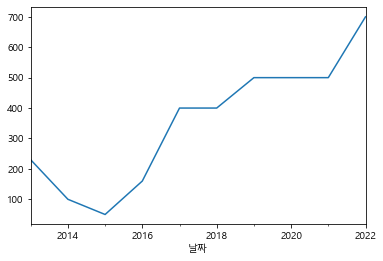

In [36]:
df_annual_f.DPS.plot()
plt.show()

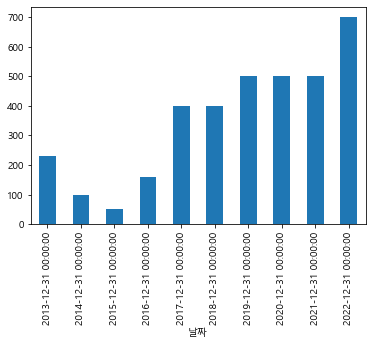

In [40]:
df_annual_f.DPS.plot(kind='bar')
plt.show()

In [41]:
div_history = df_annual_f.DPS.to_list()
div_history

[230, 100, 50, 160, 400, 400, 500, 500, 500, 700]

In [42]:
div_history.reverse()
div_history

[700, 500, 500, 500, 400, 400, 160, 50, 100, 230]

In [43]:
div_history[1:]

[500, 500, 500, 400, 400, 160, 50, 100, 230]

In [45]:
div_growth_count = 0
for div_cur, div_before in zip(div_history, div_history[1:]):
    print(f'div_cur = {div_cur}, div_before = {div_before}')
    if div_cur >= div_before:
        div_growth_count += 1
    else:
        break
div_growth_count        

div_cur = 700, div_before = 500
div_cur = 500, div_before = 500
div_cur = 500, div_before = 500
div_cur = 500, div_before = 400
div_cur = 400, div_before = 400
div_cur = 400, div_before = 160
div_cur = 160, div_before = 50
div_cur = 50, div_before = 100


7

In [52]:
def getDivGrowthYears(div_history):
    div_history.reverse()
    div_growth_count = 0
    for div_cur, div_before in zip(div_history, div_history[1:]):
        #print(f'div_cur = {div_cur}, div_before = {div_before}')
        if div_before == 0:
            break;

        if div_cur >= div_before:
            div_growth_count += 1
        else:
            break
    return div_growth_count     

In [53]:
div_growth_count = getDivGrowthYears(df_annual_f.DPS.to_list())
div_growth_count

7

"""
배당 성장 기간 동안 배당 성장률 구하기
"""

In [54]:
actual_div_growth_history = div_history[:div_growth_count+1]
actual_div_growth_history

[700, 500, 500, 500, 400, 400, 160, 50]

In [55]:
cagr = (actual_div_growth_history[0]/actual_div_growth_history[-1]) ** (1/div_growth_count) - 1
cagr

0.4579162495762834

In [56]:
def getCAGR(div_history):
    cagr = (actual_div_growth_history[0]/actual_div_growth_history[-1]) ** (1/div_growth_count) - 1
    return cagr

In [57]:
cagr = getCAGR(actual_div_growth_history)
cagr

0.4579162495762834

In [ ]:
"""
배당 유지/증가 년수 구하기
"""
def getDivGrowthCount(div_history):
    divs = div_history.copy()
    divs.reverse()
    for div in divs:

"""
목표 주가 구하기
"""

In [9]:
df_f = stock.get_market_fundamental(start_date, end_date, code, freq='d')

In [10]:
df_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2013-01-02,15772,12.15,0.81,1045,1.81,230
2013-01-03,15772,12.15,0.81,1045,1.81,230
2013-01-04,15772,11.91,0.79,1045,1.85,230
2013-01-07,15772,11.72,0.78,1045,1.88,230
2013-01-08,15772,11.53,0.76,1045,1.91,230
...,...,...,...,...,...,...
2022-12-23,21630,3.15,0.45,3071,10.85,1050
2022-12-26,21630,3.18,0.45,3071,10.74,1050
2022-12-27,21630,3.16,0.45,3071,10.84,1050


In [12]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

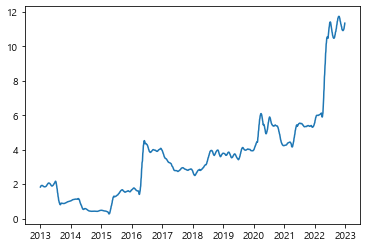

In [13]:
plt.plot(df_f.index.to_list(), div_yields)
plt.show()

In [14]:
df_p = stock.get_market_ohlcv(start_date, end_date, code)
df_p

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2013-01-02,12100,12800,12050,12700,4009057,50156042300,7.17
2013-01-03,12800,12900,12600,12700,1687420,21450723850,0.00
2013-01-04,12700,12700,12300,12450,1374673,17084729850,-1.97
2013-01-07,12500,12500,12100,12250,1293984,15829874500,-1.61
2013-01-08,12100,12300,12000,12050,1050809,12723014300,-1.63
...,...,...,...,...,...,...,...
2022-12-23,9650,9720,9630,9680,463661,4485345840,0.00
2022-12-26,9680,9790,9660,9780,671634,6534508850,1.03
2022-12-27,9790,9820,9680,9690,1231087,11998072860,-0.92


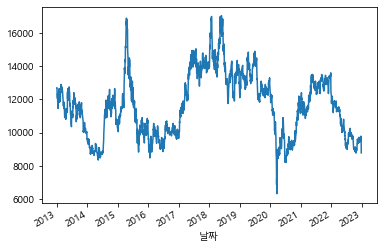

In [15]:
df_p.종가.plot()
plt.show()

""" 로우 패스 필터 """

In [18]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

In [19]:
close_prices = savgol_filter(df_p.종가, 51, 3)

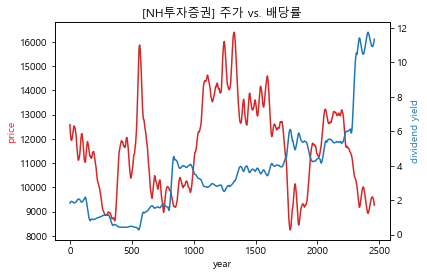

In [62]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(close_prices, color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(div_yields, color=color)
plt.title('[NH투자증권] 주가 vs. 배당률')
plt.show()

In [21]:
np.corrcoef(div_yields, close_prices)

array([[ 1.        , -0.19978161],
       [-0.19978161,  1.        ]])

"""
매수점수 계산
"""

In [22]:
df_cur_f = stock.get_market_fundamental('20230215', '20230215', code)
df_cur_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-02-15,21630,3.08,0.44,3071,11.1,1050


In [23]:
cur_div = df_cur_f.DIV[0]
cur_div

11.1

In [25]:
def get_percentage(input, min, max):
    return round((input - min) / (max - min) * 100)

def calculate_buy_score(current_div_yield, div_min, div_max):
    buy_score = get_percentage(current_div_yield, div_min, div_max)
    return buy_score

In [26]:
calculate_buy_score(cur_div, min(div_yields), max(div_yields))

94

In [27]:
div_min = min(df_f.DIV)
div_min

0.30000001192092896

In [28]:
div_max = max(df_f.DIV)
div_max

11.989999771118164

In [29]:
df_cur_f = stock.get_market_fundamental('20230215', '20230215', code)
df_cur_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-02-15,21630,3.08,0.44,3071,11.1,1050


In [30]:
cur_dps = df_cur_f.DPS[0]
cur_dps

1050

In [31]:
target_price = cur_dps/div_min * 100
target_price

349999.9860922501

In [59]:
buy_price = cur_dps/div_max * 100
buy_price

8757.297915294947

In [32]:
calculate_buy_score(df_cur_f.DIV[0], div_min, div_max)

92

"""
로우 패스 필터
"""

In [15]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

In [41]:
min(div_yields)

2.0901673

In [ ]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(df_p['종가'], color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(df_f['DIV'], color=color)
plt.show()

In [16]:
df_cur_f = stock.get_market_fundamental('20230214', '20230214', code)
df_cur_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-02-14,666803,3.52,0.46,87330,5.54,17000


In [17]:
df_cur_p = stock.get_market_ohlcv('20230214', '20230214', code)
df_cur_p

,시가,고가,저가,종가,거래량
날짜,,,,,
2023-02-14,306500,313000,304500,307000,495815


In [18]:
cur_price = df_cur_p.종가[0]
cur_price

307000

In [19]:
div_min = min(div_yields)
div_min

2.0901673

In [20]:
div_max = max(div_yields)
div_max

7.4456363

In [54]:
cur_dps = df_cur_f.DPS[0]
cur_dps

17000

In [55]:
target_price = cur_dps/div_min * 100
target_price

871794.8504767087

In [23]:
buy_price = cur_div/div_max * 100
buy_price

228321.65550373876

In [25]:
calculate_buy_score(df_cur_f.DIV[0], div_min, div_max)

64